In [1]:
import pandas

In [6]:
import numpy


In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

In [12]:
import statsmodels.formula.api as smf

In [325]:
df = pd.read_csv("Data/coupon_random.csv")
df.head(5)


,Email,Sales
0,1,82.289961
1,1,103.948000
2,1,108.381000
3,1,117.025922
4,0,108.290000


In [328]:
def func(A,B):
    if(B==0):
        return A
    else:
        return func(B, A%B)
ans= func(100, 2000)
print(ans)


100


In [329]:
def fib(n):
    if (n<=1):
        return n
    else:
         return fib(n-1) + fib(n-2)
fib(6)

8

In [326]:
result = smf.ols('Sales ~ Email', data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,95.7258,1.545,61.950,0.000,92.686,98.766
Email,5.4863,1.835,2.990,0.003,1.876,9.097


In [327]:
(df
 .groupby("Email")
 ["Sales"]
 .mean())

Email
0     95.725842
1    101.212180
Name: Sales, dtype: float64

In [32]:
wage = pd.read_csv("Data/wage.csv")
del wage['wage']
del wage['hours']
wage.head(5)


,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
1,2.782539,119,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0
2,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0


In [33]:

result = smf.ols('lhwage ~ educ', data=wage).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2954,0.089,25.754,0.000,2.121,2.470
educ,0.0529,0.007,8.107,0.000,0.040,0.066


In [34]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc']

Index(['lhwage', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married', 'black',
       'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc'],
      dtype='object')

In [36]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc']
result = smf.ols('lhwage ~ educ +' + '+'.join(controls), data=wage).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1821,0.212,5.582,0.000,0.766,1.598
educ,0.0470,0.009,5.225,0.000,0.029,0.065
IQ,0.0033,0.001,2.717,0.007,0.001,0.006
exper,0.0145,0.005,3.186,0.001,0.006,0.023
tenure,0.0095,0.003,3.192,0.001,0.004,0.015
age,0.0074,0.006,1.324,0.186,-0.004,0.018
married,0.1754,0.048,3.623,0.000,0.080,0.270
black,-0.1104,0.052,-2.131,0.033,-0.212,-0.009
south,-0.0401,0.032,-1.261,0.208,-0.102,0.022
urban,0.1892,0.032,5.860,0.000,0.126,0.253


In [54]:
email = pd.read_csv("Data/email_rfm.csv")
email.head(5)

,sales,email,opened,agreement,credit_limit,risk_score
0,740,1,1,0,2348.495260,0.666752
1,580,1,1,1,334.111969,0.207395
2,600,1,1,1,1360.660722,0.550479
3,770,0,0,0,1531.828576,0.560488
4,660,0,0,0,979.855647,0.455140


In [55]:
OldRange = (max(email['credit_limit']) - min(email['credit_limit']))  
NewRange = (1 - 0)  
email['rfm'] = (((email['credit_limit'] - min(email['credit_limit'])) * NewRange) / OldRange) + 0

In [51]:
email_bk.columns

Index(['sales', 'email', 'agreement', 'credit_limit', 'risk_score', 'rfm'], dtype='object')

In [56]:
email_bk = email
del email['opened']
del email['agreement']
del email['credit_limit']
del email['risk_score']
email.head()

,sales,email,rfm
0,740,1,0.584197
1,580,1,0.038069
2,600,1,0.316381
3,770,0,0.362787
4,660,0,0.213139


In [82]:
model = smf.ols('sales ~ email', data=email).fit()
model.summary().tables[1]
#model.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,670.0004,2.060,325.290,0.000,665.962,674.038
email,-0.6693,2.940,-0.228,0.820,-6.432,5.094


In [76]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = smf.graphics.plot_regress_exog(model, 'points', fig=fig)

AttributeError: module 'statsmodels.formula.api' has no attribute 'graphics'

<Figure size 864x576 with 0 Axes>

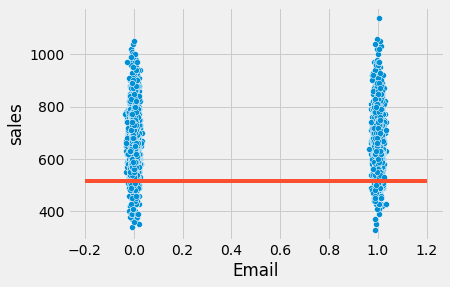

In [66]:
sns.scatterplot("email", "sales", 
                alpha=1,
                data=email.assign(email=email["email"] + np.random.normal(0, 0.01, size=len(email["email"]))))
plt.plot(np.linspace(-0.2, 1.2), model.params[0] + np.linspace(0, 0) * model.params[1], c="C1")
plt.xlabel("Email")
plt.ylabel("sales");

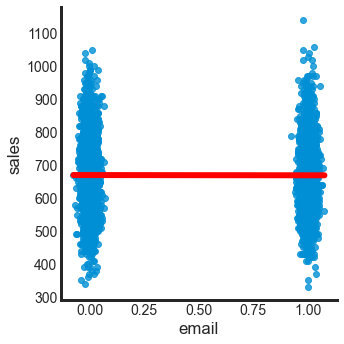

In [74]:

df = email
email['email']=email["email"] + np.random.normal(0, 0.01, size=len(email["email"]))
sns.set_style("white")
sns.lmplot(x = "email",
            y = "sales", 
            line_kws={'color': 'red'},
            ci = None,
            data = df)

In [68]:
model.params[0] + np.linspace(-1, 2) * model.params[1]

array([513.4699817 , 513.74010043, 514.01021916, 514.28033789,
       514.55045662, 514.82057535, 515.09069408, 515.36081281,
       515.63093154, 515.90105027, 516.171169  , 516.44128773,
       516.71140647, 516.9815252 , 517.25164393, 517.52176266,
       517.79188139, 518.06200012, 518.33211885, 518.60223758,
       518.87235631, 519.14247504, 519.41259377, 519.6827125 ,
       519.95283123, 520.22294996, 520.49306869, 520.76318742,
       521.03330615, 521.30342488, 521.57354361, 521.84366234,
       522.11378107, 522.3838998 , 522.65401853, 522.92413726,
       523.19425599, 523.46437472, 523.73449345, 524.00461218,
       524.27473091, 524.54484964, 524.81496837, 525.0850871 ,
       525.35520583, 525.62532456, 525.89544329, 526.16556202,
       526.43568075, 526.70579948])

In [79]:
model = smf.ols('sales ~ email + rfm', data=email).fit()
model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,517.9040,2.699,191.888,0.000,512.613,523.195
email,4.3708,2.127,2.055,0.040,0.202,8.540
rfm,551.2506,8.159,67.567,0.000,535.256,567.245


In [81]:
model_email = smf.ols('email ~ rfm', data=email).fit()
model_email.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5271,0.016,32.279,0.000,0.495,0.559
rfm,-0.1346,0.054,-2.481,0.013,-0.241,-0.028


In [91]:
# generating selection bias data
import random
#Generate 5 random numbers between 10 and 30
price = numpy.random.uniform(20, 40, size=(1, 300))

In [185]:
ncigs = 6-0.1*price
np.min(ncigs), np.max(ncigs)

(2.006686984926633, 3.9820163705156815)

In [186]:
health = 80+0.7*price -8*ncigs

In [187]:
np.min(health), np.max(health)

(62.26975444226477, 91.8996952261005)

In [189]:
ncigs = ncigs.flatten()
price = price.flatten()
health = health.flatten()

In [190]:
cig = pd.DataFrame(list_of_tuples, columns=['price', 'ncigs', 'health'])

In [191]:
list_of_tuples = list(zip(price, ncigs, health))

In [192]:
cig = pd.DataFrame(list_of_tuples, columns=['price', 'ncigs', 'health'])

In [193]:
cig.head()

,price,ncigs,health
0,38.711218,2.128878,90.066827
1,23.136674,3.686333,66.705012
2,37.889849,2.211015,88.834774
3,36.531454,2.346855,86.797181
4,36.824919,2.317508,87.237378


In [194]:
model = smf.ols('health ~ price', data=cig).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.0000,1.38e-14,2.32e+15,0.000,32.000,32.000
price,1.5000,4.48e-16,3.35e+15,0.000,1.500,1.500


In [195]:
model = smf.ols('health ~ price +ncigs', data=cig).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.8976,4.11e-16,2.18e+15,0.000,0.898,0.898
price,2.0184,2.59e-16,7.81e+15,0.000,2.018,2.018
ncigs,5.1837,2.49e-15,2.08e+15,0.000,5.184,5.184


In [196]:
model = smf.ols('ncigs ~ price', data=cig).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.0000,6.62e-16,9.07e+15,0.000,6.000,6.000
price,-0.1000,2.15e-17,-4.65e+15,0.000,-0.100,-0.100


In [223]:
email = pd.read_csv("Data/email_rfm.csv")
email.head(5)

,sales,email,opened,agreement,credit_limit,risk_score
0,740,1,1,0,2348.495260,0.666752
1,580,1,1,1,334.111969,0.207395
2,600,1,1,1,1360.660722,0.550479
3,770,0,0,0,1531.828576,0.560488
4,660,0,0,0,979.855647,0.455140


In [238]:
model_2 = smf.ols('sales ~ email + credit_limit + risk_score', data=email).fit()
model_2.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,490.8653,9.715,50.527,0.000,471.820,509.911
email,4.4304,2.130,2.080,0.038,0.255,8.606
credit_limit,0.1511,0.008,18.833,0.000,0.135,0.167
risk_score,-8.0516,38.424,-0.210,0.834,-83.379,67.276


In [239]:
email.shape

(5000, 7)

In [240]:
#email['wage'] = 500+120.8*email['email'] +(numpy.random.uniform(1, 40, size=(1, 5000))).flatten()
email['wage']=np.abs(model_2.resid)
np.min(email['wage']), np.max(email['wage'])

(0.012575598755120154, 264.06719210454685)

In [241]:
email.head()

,sales,email,opened,agreement,credit_limit,risk_score,wage
0,740,1,1,0,2348.495260,0.666752,104.711150
1,580,1,1,1,334.111969,0.207395,35.900406
2,600,1,1,1,1360.660722,0.550479,96.416532
3,770,0,0,0,1531.828576,0.560488,52.236323
4,660,0,0,0,979.855647,0.455140,24.773895


In [260]:
df=email
df = df.rename(columns={'email':"educ", 'opened':'whitecollar'})

In [261]:
df.head()

,sales,educ,whitecollar,agreement,credit_limit,risk_score,wage
0,740,1,1,0,2348.495260,0.666752,104.711150
1,580,1,1,1,334.111969,0.207395,35.900406
2,600,1,1,1,1360.660722,0.550479,96.416532
3,770,0,0,0,1531.828576,0.560488,52.236323
4,660,0,0,0,979.855647,0.455140,24.773895


In [262]:
df = df[['wage','educ','whitecollar']]
df.iloc[12:17,:]

,wage,educ,whitecollar
12,112.032298,1,1
13,62.529750,1,1
14,205.628069,1,1
15,42.049558,0,0
16,9.867382,1,0


In [263]:
model = smf.ols('wage ~ educ', data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,59.1265,0.914,64.712,0.000,57.335,60.918
educ,0.4639,1.304,0.356,0.722,-2.093,3.021


In [264]:
model = smf.ols('wage ~ educ + whitecollar', data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,59.1265,0.914,64.707,0.000,57.335,60.918
educ,-0.0154,1.671,-0.009,0.993,-3.290,3.260
whitecollar,0.8604,1.874,0.459,0.646,-2.813,4.534


In [ ]:
OldRange = (max(email['credit_limit']) - min(email['credit_limit']))  
NewRange = (1 - 0)  
email['rfm'] = (((email['credit_limit'] - min(email['credit_limit'])) * NewRange) / OldRange) + 0

In [ ]:
email_bk = email
del email['opened']
del email['agreement']
del email['credit_limit']
del email['risk_score']
email.head()

In [271]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 40 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(engagement_score=enem_score, profile_picture=tablet, Tablet=tablet))

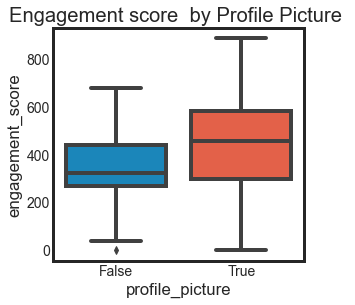

In [274]:
plt.figure(figsize=(4,4))
sns.set_style("white")
sns.boxplot(y="engagement_score", x="profile_picture", data=data).set_title('Engagement score  by Profile Picture ')
plt.show()

In [288]:
import graphviz as gr

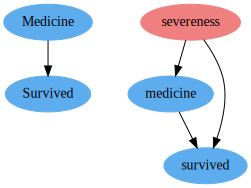

In [323]:
g = gr.Digraph(node_attr={'color': 'steelblue2', 'style': 'filled'})
g.edge("Medicine", "Survived")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")
g.node("severeness", "severeness", color="lightcoral")
g

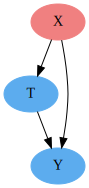

In [318]:
g = gr.Digraph(node_attr={'color': 'steelblue2', 'style': 'filled'})
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")
g.node("X", "X", color="lightcoral")
g

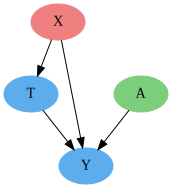

In [324]:

g = gr.Digraph(node_attr={'color': 'steelblue2', 'style': 'filled'})
g.edge("X", "T")
g.edge("A", "Y")
g.edge("X", "Y")
g.edge("T", "Y")
g.node("X", "X", color="lightcoral")
g.node("A", "A", color="palegreen3")
g

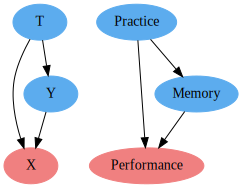

In [322]:
g = gr.Digraph(node_attr={'color': 'steelblue2', 'style': 'filled'})
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="lightcoral")

g.edge("Practice", "Performance")
g.edge("Practice", "Memory")
g.edge("Memory", "Performance")
g.node("Performance", "Performance", color="lightcoral")

g

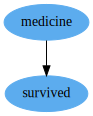

In [309]:
g = gr.Digraph(node_attr={'color': 'steelblue2', 'style': 'filled'})

g.edge("medicine", "survived")


g

In [292]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [293]:
os.environ["PATH"]

'c:\\Users\\Zain\\Desktop\\Github\\CausalInference\\venv\\lib\\site-packages\\pywin32_system32;C:\\Users\\Zain\\Desktop\\Github\\CausalInference\\venv\\lib\\site-packages\\pywin32_system32;C:\\Users\\Zain\\Desktop\\Github\\CausalInference\\venv\\Scripts;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;C:\\Users\\Zain\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Users\\Zain\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;c:\\Users\\Zain\\Desktop\\Github\\CausalInference\\venv\\lib\\site-packages\\numpy\\.libs;c:\\Users\\Zain\\Desktop\\Github\\CausalInference\\venv\\lib\\site-packages\\scipy\\.libs;C:\\Program Files\\Graphviz\x08in;C:/Program Files/Graphviz/bin;C:/Program Files/Graphviz/bin;C:/Program Files/Graphviz/bin'